<a href="https://colab.research.google.com/github/pradiptars/Convert_to_Numaricdata/blob/main/Convert_Numerical_Format.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Price Prediction full deployment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:

from google.colab import files
uploaded = files.upload()

Saving Bengaluru_House_Data.csv to Bengaluru_House_Data.csv


In [3]:
df_raw = pd.read_csv('Bengaluru_House_Data.csv')

In [4]:
df_raw.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
df_raw.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [7]:
df = df_raw.copy()

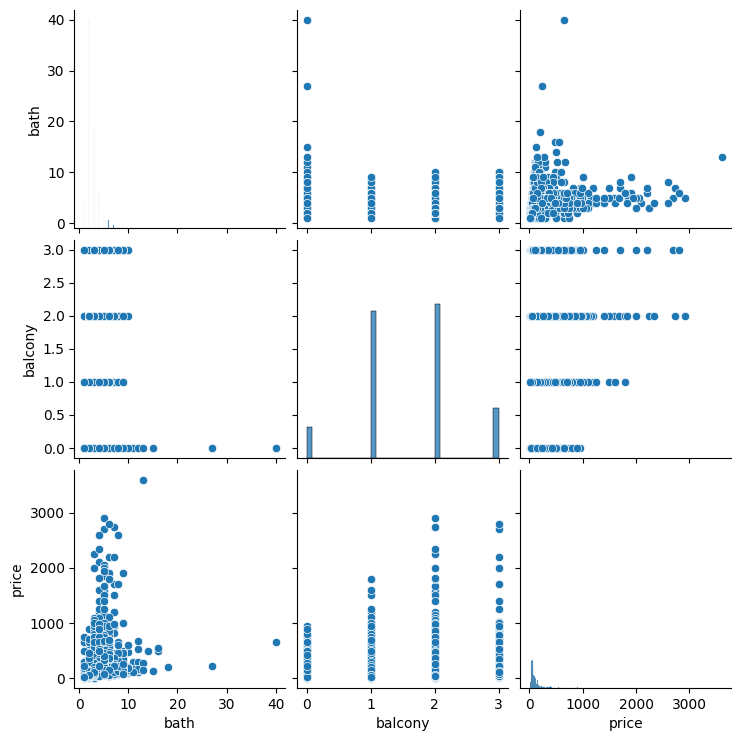

In [8]:
sns.pairplot(df)

In [9]:
def value_count(df):
    for i in df.columns:
        print(i)
        print(df[i].value_counts())

In [10]:
value_count(df)

area_type
area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64
availability
availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64
location
location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64
size
size
2 BHK         5199
3 BHK         43

In [11]:
num_var = df.select_dtypes(include=['int64','float64']).columns


<Axes: >

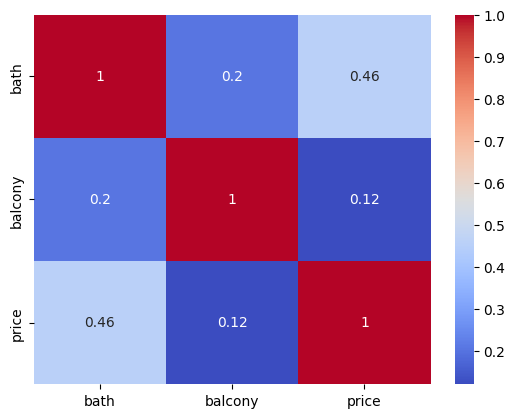

In [12]:
sns.heatmap(df[num_var].corr(),annot=True, cmap='coolwarm')

In [13]:
df.isnull().sum()

,0
area_type,0
availability,0
location,1
size,16
society,5502
total_sqft,0
bath,73
balcony,609
price,0


In [14]:
df.isnull().mean()*100

,0
area_type,0.000000
availability,0.000000
location,0.007508
size,0.120120
society,41.306306
total_sqft,0.000000
bath,0.548048
balcony,4.572072
price,0.000000


<Axes: >

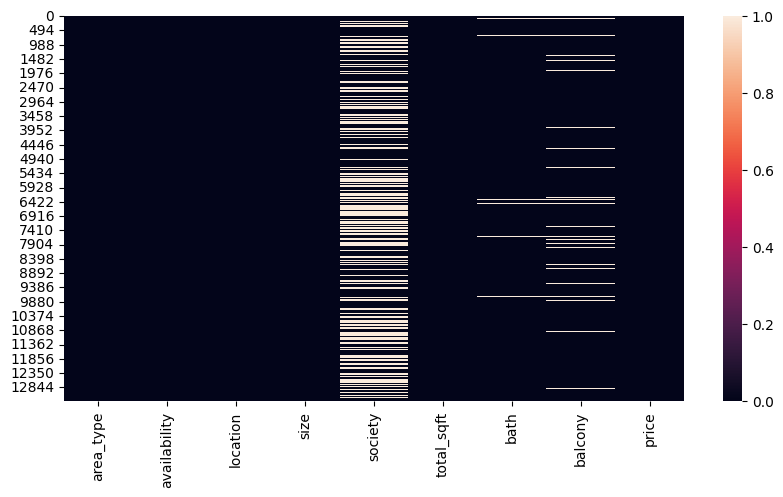

In [15]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull())

In [16]:
df2 = df.drop(['society'],axis=1)

In [17]:
df2.shape

(13320, 8)

In [18]:
df2['balcony'] = df2['balcony'].fillna(df2['balcony'].mean())

In [19]:
df2.isnull().sum()

,0
area_type,0
availability,0
location,1
size,16
total_sqft,0
bath,73
balcony,0
price,0


In [20]:
df3 = df2.dropna()
df3.shape

(13246, 8)

In [21]:
df3.isnull().sum()

,0
area_type,0
availability,0
location,0
size,0
total_sqft,0
bath,0
balcony,0
price,0


In [22]:
df3.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


# Feature Engineering

In [23]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [24]:
df3.select_dtypes(include='object').columns

Index(['area_type', 'availability', 'location', 'size', 'total_sqft'], dtype='object')

# convert Object Data to numeric

In [25]:
total_sqft_int =[]
for str_val in df3['total_sqft']:
  try:
    total_sqft_int.append(float(str_val))
  except:
    try:
      temp =[]
      temp = str_val.split('-')
      total_sqft_int.append((float(temp[0])+float(temp[1]))/2)
    except:
      total_sqft_int.append(np.nan)

In [26]:
df4 = df3.reset_index(drop=True)

In [27]:
df4.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [28]:
df5 = df4.join(pd.DataFrame(total_sqft_int,columns=['total_sqft_int']))

In [29]:
df5.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,1521.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,1200.0


In [30]:
df5.isnull().sum()

,0
area_type,0
availability,0
location,0
size,0
total_sqft,0
bath,0
balcony,0
price,0
total_sqft_int,46


In [31]:



df6 = df5.dropna()

In [32]:
df6.shape

(13200, 9)

In [33]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13200 entries, 0 to 13245
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_type       13200 non-null  object 
 1   availability    13200 non-null  object 
 2   location        13200 non-null  object 
 3   size            13200 non-null  object 
 4   total_sqft      13200 non-null  object 
 5   bath            13200 non-null  float64
 6   balcony         13200 non-null  float64
 7   price           13200 non-null  float64
 8   total_sqft_int  13200 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.0+ MB


In [34]:
df6.select_dtypes(include='object').columns

Index(['area_type', 'availability', 'location', 'size', 'total_sqft'], dtype='object')

In [35]:
df6['size'].value_counts()

,count
size,
2 BHK,5192
3 BHK,4277
4 Bedroom,816
4 BHK,574
3 Bedroom,541
1 BHK,527
2 Bedroom,325
5 Bedroom,293
6 Bedroom,190


In [36]:
size_int = [] #create a new columns for size removing string value
for str_val in df6['size']:
  try:
    size_int.append(int(str_val.split(' ')[0]))
  except:
    size_int.append(np.nan)

In [37]:
df6 = df6.reset_index(drop=True)

In [38]:
df7 = df6.join(pd.DataFrame(size_int,columns=['size_int']))

In [39]:
df7.shape

(13200, 10)

In [40]:
df7.tail()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,size_int
13195,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.000000,231.0,3453.0,5
13196,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,5.0,1.584376,400.0,3600.0,4
13197,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.000000,60.0,1141.0,2
13198,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,1.000000,488.0,4689.0,4
13199,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,550,1.0,1.000000,17.0,550.0,1


# Finding Outlair and Remove

In [41]:

import scipy.stats as stats

In [42]:
def diagonstic_plots(df, variable): #creat a function draw plots
  plt.figure(figsize=(16,4))
  plt.subplot(1,3,1)
  sns.distplot(df[variable], bins=30)
  plt.title('Histogram {}'.format(variable))
  plt.subplot(1,3,2) #Q-Q plot
  stats.probplot(df[variable], dist='norm', plot=plt)
  plt.subplot(1,3,3)
  sns.boxplot(df[variable])
  plt.show()

In [43]:
df7.select_dtypes(include=['int64', 'float64']).columns

Index(['bath', 'balcony', 'price', 'total_sqft_int', 'size_int'], dtype='object')

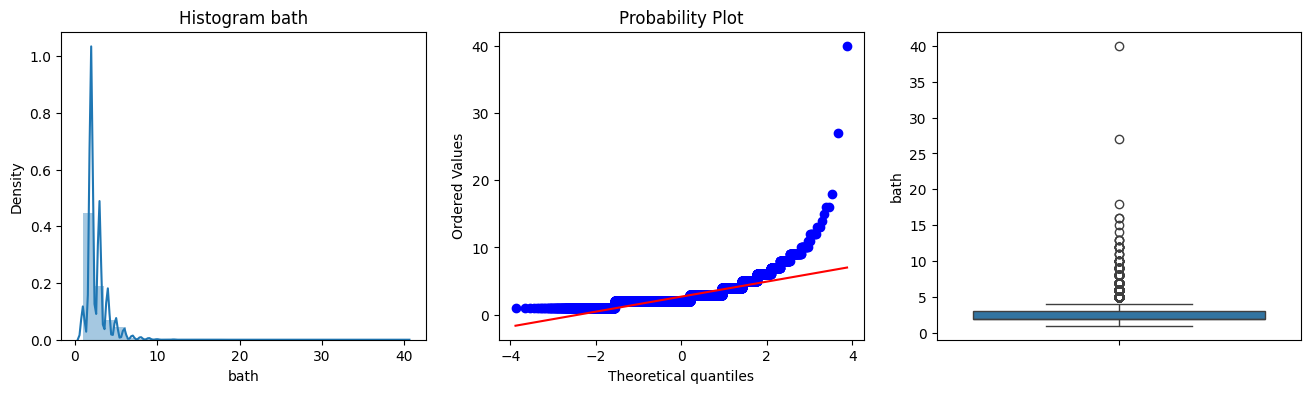

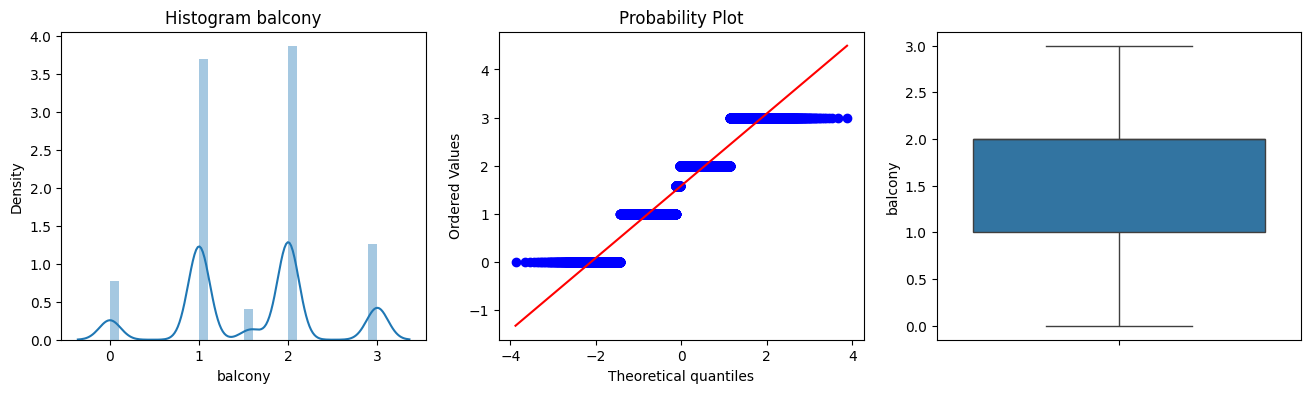

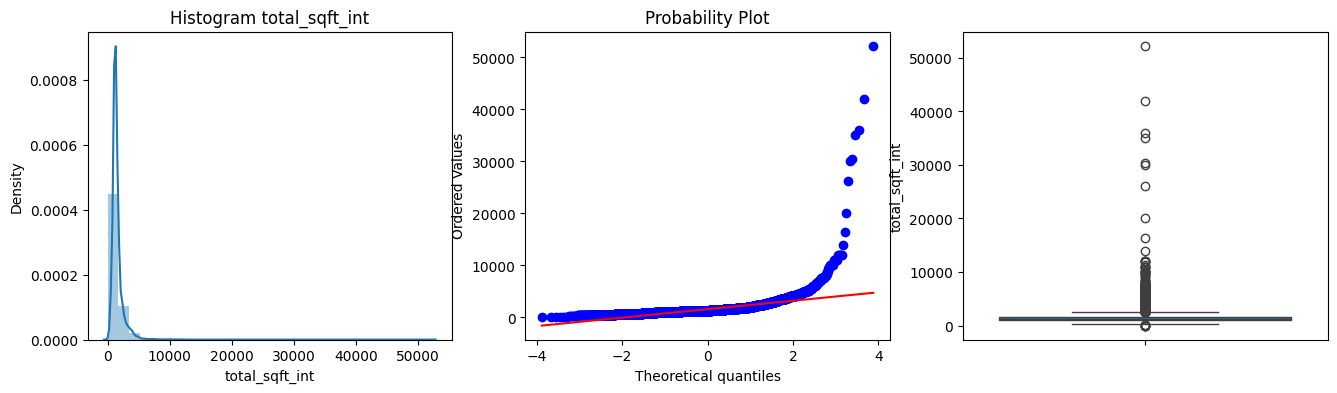

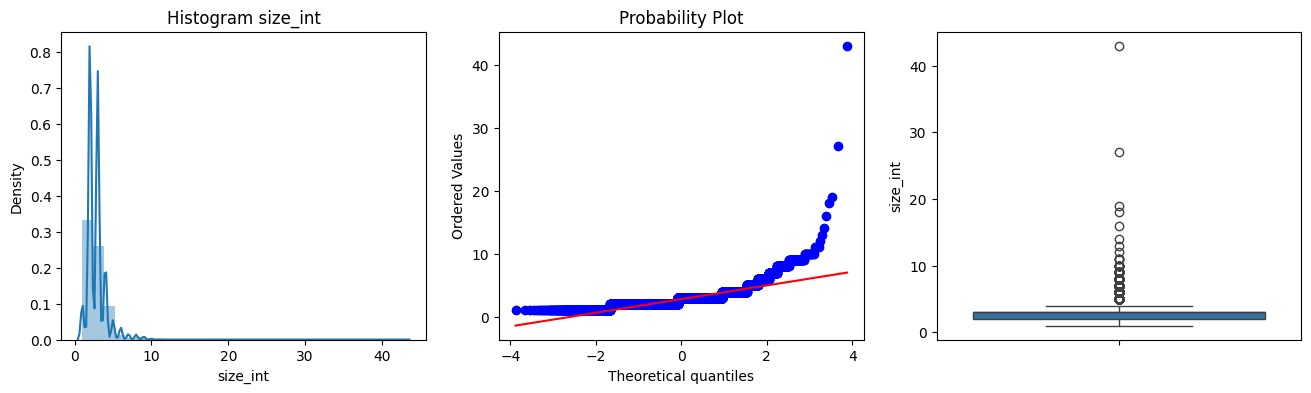

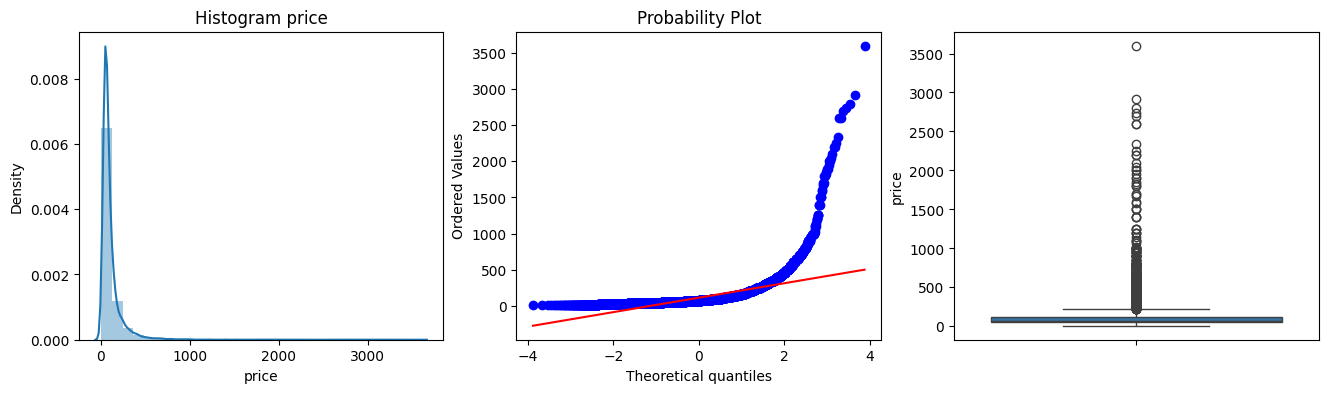

In [44]:
num_ver = ['bath', 'balcony', 'total_sqft_int', 'size_int', 'price']
for var in num_ver:
  diagonstic_plots(df7,var)

In [45]:
df7[df7['total_sqft_int']/df7['size_int']<350].head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,size_int
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,1020,6.0,1.584376,370.0,1020.0,6
26,Super built-up Area,Ready To Move,Electronic City,2 BHK,660,1.0,1.000000,23.1,660.0,2
29,Super built-up Area,Ready To Move,Electronic City,3 BHK,1025,2.0,1.000000,47.0,1025.0,3
45,Plot Area,Ready To Move,HSR Layout,8 Bedroom,600,9.0,1.584376,200.0,600.0,8
57,Plot Area,Ready To Move,Murugeshpalya,6 Bedroom,1407,4.0,1.000000,150.0,1407.0,6


In [46]:
df8 = df7[~(df7['total_sqft_int']/df7['size_int']<350)]
df8.shape

(12106, 10)

In [47]:
df8['price_per_sqft'] = df8['price']*100000/df8['total_sqft_int']
df8.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,size_int,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,1056.0,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,2600.0,4,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,1440.0,3,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,1521.0,3,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,1200.0,2,4250.000000


In [48]:
df8.price_per_sqft.describe()

,price_per_sqft
count,12106.000000
mean,6184.466889
std,4019.983503
min,267.829813
25%,4200.030048
50%,5261.108523
75%,6800.000000
max,176470.588235


In [49]:
from functools import reduce
def remove_outlier(df):
  df_out = pd.DataFrame()
  for key, subdf in df.groupby('location'):
    m = np.mean(subdf.price_per_sqft)
    st = np.std(subdf.price_per_sqft)
    reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
    df_out = pd.concat([df_out,reduced_df],ignore_index=True)
  return df_out

df9 = remove_outlier(df8)
df9.shape


(8888, 11)

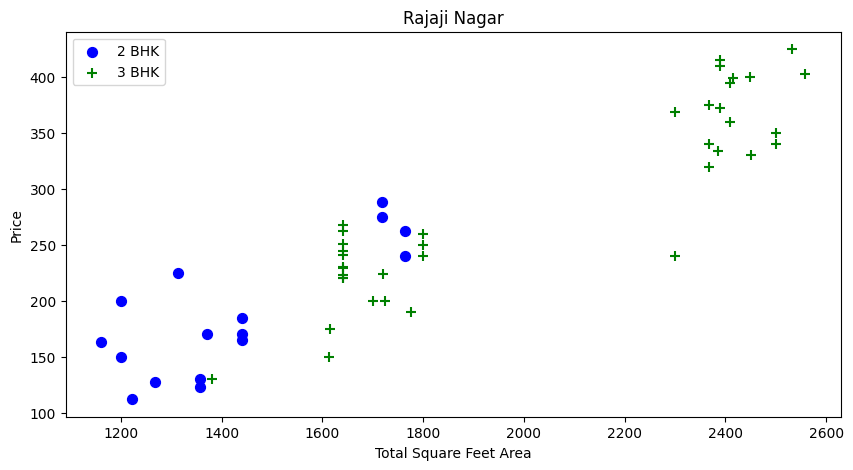

In [50]:
def plot_scatter_chart(df, location):
  bhk2 = df[(df.location==location) & (df.size_int==2)]
  bhk3 = df[(df.location==location) & (df.size_int==3)]
  plt.figure(figsize=(10,5))
  plt.scatter(bhk2.total_sqft_int, bhk2.price, color='blue', label='2 BHK', s=50)
  plt.scatter(bhk3.total_sqft_int, bhk3.price, marker='+', color='green', label='3 BHK', s=50)
  plt.xlabel('Total Square Feet Area')
  plt.ylabel('Price')
  plt.title(location)
  plt.legend()
plot_scatter_chart(df9,'Rajaji Nagar')


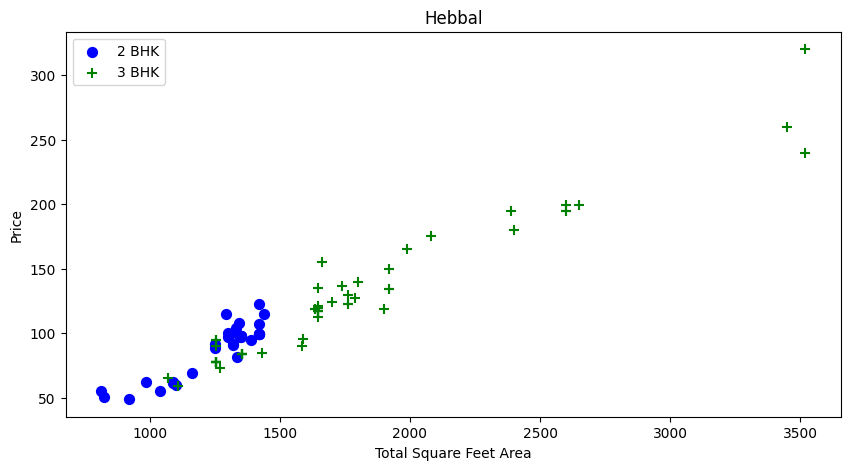

In [51]:
plot_scatter_chart(df9,'Hebbal')

In [52]:
def remove_bhk_outliers(df):
  exclude_indices = np.array([])
  for location, location_df in df.groupby('location'):
    bhk_stats = {}
    for bhk, bhk_df in location_df.groupby('size_int'):
      bhk_stats[bhk] = {
          'mean': np.mean(bhk_df.price_per_sqft),
          'std': np.std(bhk_df.price_per_sqft),
          'count': bhk_df.shape[0]
      }
      for bhk, bhk_df in location_df.groupby('size_int'):
        stats = bhk_stats.get(bhk-1)
        if stats and stats['count']>5:
          exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
          return df.drop(exclude_indices, axis='index')
df10 = remove_bhk_outliers(df9)
df10.shape

(8886, 11)

# Remove Outlair with Bath Feature

In [53]:
df10.bath.unique()

array([ 3.,  2.,  1.,  4.,  5.,  8.,  9.,  6.,  7., 12.])

In [54]:
df10[df10.bath> df10.size_int+2]

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,size_int,price_per_sqft
1861,Built-up Area,Ready To Move,Chikkabanavar,4 Bedroom,2460,7.0,2.000000,80.0,2460.0,4,3252.032520
5836,Built-up Area,Ready To Move,Nagasandra,4 Bedroom,7000,8.0,1.584376,450.0,7000.0,4,6428.571429
7098,Super built-up Area,Ready To Move,Sathya Sai Layout,6 BHK,11338,9.0,1.000000,1000.0,11338.0,6,8819.897689
7569,Super built-up Area,Ready To Move,Thanisandra,3 BHK,1806,6.0,2.000000,116.0,1806.0,3,6423.034330


In [55]:

df11 = df10[df10.bath < df10.size_int+2]
df11.shape

(8799, 11)

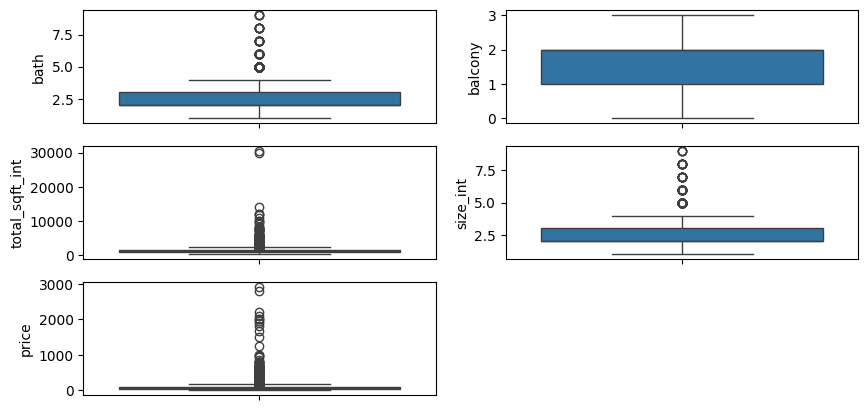

In [56]:
plt.figure(figsize=(10,5))
for i, var in enumerate(num_ver):
  plt.subplot(3,2,i+1)
  sns.boxplot(df11[var])

In [57]:
df11.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,size_int,price_per_sqft
0,Super built-up Area,Ready To Move,Devarabeesana Halli,3 BHK,1672,3.0,2.0,150.0,1672.0,3,8971.291866
1,Built-up Area,Ready To Move,Devarabeesana Halli,3 BHK,1750,3.0,3.0,149.0,1750.0,3,8514.285714
2,Super built-up Area,Ready To Move,Devarabeesana Halli,3 BHK,1750,3.0,2.0,150.0,1750.0,3,8571.428571
4,Super built-up Area,Ready To Move,Devarachikkanahalli,2 BHK,1250,2.0,2.0,40.0,1250.0,2,3200.000000
5,Plot Area,Ready To Move,Devarachikkanahalli,2 Bedroom,1200,2.0,2.0,83.0,1200.0,2,6916.666667


# Drop Other Catagarical Colmns

In [58]:
df12 = df11.drop(['area_type','availability','location','size','total_sqft','total_sqft_int'], axis=1)
df12.head()

,bath,balcony,price,size_int,price_per_sqft
0,3.0,2.0,150.0,3,8971.291866
1,3.0,3.0,149.0,3,8514.285714
2,3.0,2.0,150.0,3,8571.428571
4,2.0,2.0,40.0,2,3200.000000
5,2.0,2.0,83.0,2,6916.666667


In [59]:
df12.to_csv('Cleaned_data.csv', index=False)

In [60]:
X = df12.drop('price_per_sqft', axis=1)
y = df12.price_per_sqft

# Convert to numaric Data

In [61]:
df13 = df11.drop(['size', 'total_sqft'], axis=1)
df13.head()

,area_type,availability,location,bath,balcony,price,total_sqft_int,size_int,price_per_sqft
0,Super built-up Area,Ready To Move,Devarabeesana Halli,3.0,2.0,150.0,1672.0,3,8971.291866
1,Built-up Area,Ready To Move,Devarabeesana Halli,3.0,3.0,149.0,1750.0,3,8514.285714
2,Super built-up Area,Ready To Move,Devarabeesana Halli,3.0,2.0,150.0,1750.0,3,8571.428571
4,Super built-up Area,Ready To Move,Devarachikkanahalli,2.0,2.0,40.0,1250.0,2,3200.000000
5,Plot Area,Ready To Move,Devarachikkanahalli,2.0,2.0,83.0,1200.0,2,6916.666667


In [62]:
df14 = pd.get_dummies(df13, drop_first=True, columns=['area_type', 'availability', 'location'])
df14.shape

(8799, 826)

In [63]:
df14.head()

,bath,balcony,price,total_sqft_int,size_int,price_per_sqft,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_15-Aug,availability_15-Dec,availability_15-Jun,availability_15-Nov,availability_15-Oct,availability_16-Dec,availability_16-Jul,availability_16-Mar,availability_16-Nov,availability_16-Oct,availability_16-Sep,availability_17-Apr,availability_17-Aug,availability_17-Dec,availability_17-Jan,availability_17-Jul,availability_17-Jun,availability_17-Mar,availability_17-May,availability_17-Nov,availability_17-Oct,availability_17-Sep,availability_18-Apr,availability_18-Aug,availability_18-Dec,availability_18-Feb,availability_18-Jan,availability_18-Jul,availability_18-Jun,availability_18-Mar,availability_18-May,availability_18-Nov,availability_18-Oct,availability_18-Sep,availability_19-Apr,availability_19-Aug,availability_19-Dec,availability_19-Feb,availability_19-Jan,availability_19-Jul,availability_19-Jun,availability_19-Mar,availability_19-May,availability_19-Nov,availability_19-Oct,availability_19-Sep,availability_20-Apr,availability_20-Aug,availability_20-Dec,availability_20-Feb,availability_20-Jan,availability_20-Jul,availability_20-Jun,availability_20-Mar,availability_20-May,availability_20-Nov,availability_20-Oct,availability_20-Sep,availability_21-Aug,availability_21-Dec,availability_21-Feb,availability_21-Jan,availability_21-Jul,availability_21-Jun,availability_21-Mar,availability_21-May,availability_21-Nov,availability_21-Oct,availability_21-Sep,availability_22-Dec,availability_22-Jan,availability_22-Jun,availability_22-Mar,availability_22-May,availability_22-Nov,availability_Ready To Move,location_ Devarachikkanahalli,location_ Electronic City,location_ Mysore Highway,location_ Rachenahalli,location_ Thanisandra,location_ south,location_1st Block BEL Layout,location_1st Block HBR Layout,location_1st Block HRBR Layout,location_1st Block Jayanagar,location_1st Block Koramangala,location_1st Phase JP Nagar,location_1st Stage Indira Nagar,location_2nd Block Hrbr Layout,location_2nd Block Jayanagar,location_2nd Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,location_3rd Block Banashankari,location_3rd Block Hrbr Layout,location_3rd Block Jayanagar,location_3rd Block Koramangala,location_3rd Phase JP Nagar,location_4th Block Jayanagar,location_4th Block Koramangala,location_4th Phase JP Nagar,location_4th T block Jayanagar,location_5th Block Hbr Layout,location_5th Phase JP Nagar,location_6th Phase JP Nagar,location_6th block Koramangala,location_7th Block Jayanagar,location_7th Phase JP Nagar,location_8th Block Jayanagar,location_8th Phase JP Nagar,location_8th block Koramangala,location_9th Block Jayanagar,location_9th Phase JP Nagar,location_A Narayanapura,location_AECS Layout,location_AGS Layout,location_AMS Layout,location_Abbaiah Reddy Layout,location_Abbigere,location_Agrahara Dasarahalli,location_Aishwarya Crystal Layout,location_Akshaya Nagar,location_Akshaya Vana,location_Akshayanagara East,location_Akshya Nagar,location_Alfa Garden Layout,location_Alur,location_Amarjyothi Colony,location_Ambalipura,location_Ambedkar Colony,location_Ambedkar Nagar,location_Amblipura,location_Amruthahalli,location_Amruthnagar,location_Anand Nagar,location_Anand nagar,location_Anandapura,location_Anantapura,location_Ananth Nagar,location_Anekal,location_Anjanapura,location_Anjappa Layout,location_Ankappa Layout,location_Annaiah Reddy Layout,location_Anugrah Layout,location_Anwar Layout,location_Ardendale,location_Arehalli,location_Arekere,location_Ashirvad Colony,location_Ashok Nagar,location_Ashwath Nagar,location_Ashwathnagar,location_Ashwini layout,location_Atmananda Colony,location_Attibele,location_Attur Layout,location_Austin Town,location_Avalahalli,location_Ayappa Nagar,location_B Channasandra,location_B Narayanapura,location_BCC Layout,location_BCMC Layout,location_BEL Road,location_BEML Layout,location_BSM Extension,location_BTM 1st Stage,location_BTM 2nd St

In [64]:
df14.to_csv('Oh_encoding_data.csv', index=False)

# Working on Area_type Feature

In [65]:
df13['area_type'].value_counts()

,count
area_type,
Super built-up Area,6661
Built-up Area,1599
Plot Area,498
Carpet Area,41


Remove Carpet_Area

convert area_type varible to numaric

In [66]:
df15 = df13.copy()
for cat_var in ['Super built-up Area', 'Built-up Area', 'Plot Area']:
  df15['area_type'+cat_var] = np.where(df15['area_type']==cat_var, 1, 0)
df15.head(2)

,area_type,availability,location,bath,balcony,price,total_sqft_int,size_int,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area
0,Super built-up Area,Ready To Move,Devarabeesana Halli,3.0,2.0,150.0,1672.0,3,8971.291866,0,0,0
1,Built-up Area,Ready To Move,Devarabeesana Halli,3.0,3.0,149.0,1750.0,3,8514.285714,0,0,0


# convert avilability to numaric

In [67]:
df15['availability'].value_counts()

,count
availability,
Ready To Move,6869
18-Dec,240
18-May,198
18-Apr,189
18-Aug,153
19-Dec,130
18-Jul,111
18-Mar,82
21-Dec,81


In [68]:
df15['Ready To Move'] = np.where(df15['availability']=='Ready To Move', 1, 0)
df15.head(2)

,area_type,availability,location,bath,balcony,price,total_sqft_int,size_int,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,Ready To Move
0,Super built-up Area,Ready To Move,Devarabeesana Halli,3.0,2.0,150.0,1672.0,3,8971.291866,0,0,0,1
1,Built-up Area,Ready To Move,Devarabeesana Halli,3.0,3.0,149.0,1750.0,3,8514.285714,0,0,0,1


# convert Location to numaric

In [69]:
location_value = df15['location'].value_counts()
location_value

,count
location,
Whitefield,473
Sarjapur Road,285
Electronic City,268
Kanakpura Road,189
Yelahanka,166
Marathahalli,149
Uttarahalli,149
Thanisandra,148
Bannerghatta Road,143


In [70]:
location_gret_20 = location_value[location_value>20].index # 20 time present location consider, other droped
location_gret_20

Index(['Whitefield', 'Sarjapur  Road', 'Electronic City', 'Kanakpura Road',
       'Yelahanka', 'Marathahalli', 'Uttarahalli', 'Thanisandra',
       'Bannerghatta Road', 'Raja Rajeshwari Nagar',
       ...
       '9th Phase JP Nagar', 'Mahadevpura', 'Kammasandra', 'Kalena Agrahara',
       'Choodasandra', 'Seegehalli', 'Gunjur', 'Chikkalasandra',
       'Iblur Village', 'Babusapalaya'],
      dtype='object', name='location', length=106)

In [71]:
df16 = df15.copy()
for cat_var in location_gret_20:
  df16['location'+cat_var] = np.where(df15['location']==cat_var, 1, 0)
df16.head(2)

,area_type,availability,location,bath,balcony,price,total_sqft_int,size_int,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,Ready To Move,locationWhitefield,locationSarjapur Road,locationElectronic City,locationKanakpura Road,locationYelahanka,locationMarathahalli,locationUttarahalli,locationThanisandra,locationBannerghatta Road,locationRaja Rajeshwari Nagar,locationHennur Road,locationHaralur Road,locationElectronic City Phase II,locationHebbal,location7th Phase JP Nagar,locationChandapura,locationBellandur,locationKasavanhalli,locationRajaji Nagar,locationKR Puram,locationSarjapur,locationYeshwanthpur,locationBegur Road,locationBanashankari,locationElectronics City Phase 1,locationKothanur,locationHormavu,locationHoodi,locationKoramangala,locationKengeri,locationJakkur,locationHarlur,locationRamagondanahalli,locationRamamurthy Nagar,locationTC Palaya,locationKaggadasapura,locationAkshaya Nagar,locationJP Nagar,locationVarthur,locationThigalarapalya,locationBudigere,locationHSR Layout,locationHulimavu,locationBisuvanahalli,locationHennur,locationKundalahalli,location8th Phase JP Nagar,locationJigani,locationRachenahalli,locationBrookefield,locationIndira Nagar,locationMalleshwaram,locationGottigere,locationVittasandra,locationHosa Road,locationBalagere,locationNagarbhavi,locationBhoganhalli,locationChannasandra,locationKudlu Gate,locationMysore Road,locationJalahalli,locationOld Madras Road,locationHegde Nagar,locationVijayanagar,locationYelahanka New Town,locationKadugodi,locationAttibele,locationDevanahalli,locationSahakara Nagar,locationOld Airport Road,locationPanathur,locationBommasandra,location5th Phase JP Nagar,locationGreen Glen Layout,locationCV Raman Nagar,locationKanakapura,locationSubramanyapura,locationFrazer Town,locationDodda Nekkundi,locationHosur Road,locationAmbedkar Nagar,locationTalaghattapura,locationKudlu,locationAnanth Nagar,locationHebbal Kempapura,locationDoddathoguru,locationAnekal,locationLakshminarayana Pura,locationKengeri Satellite Town,locationHoramavu Agara,locationR.T. Nagar,locationVidyaranyapura,locationBTM 2nd Stage,locationTumkur Road,locationHoramavu Banaswadi,location9th Phase JP Nagar,locationMahadevpura,locationKammasandra,locationKalena Agrahara,locationChoodasandra,locationSeegehalli,locationGunjur,locationChikkalasandra,locationIblur Village,locationBabusapalaya
0,Super built-up Area,Ready To Move,Devarabeesana Halli,3.0,2.0,150.0,1672.0,3,8971.291866,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Built-up Area,Ready To Move,Devarabeesana Halli,3.0,3.0,149.0,1750.0,3,8514.285714,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [72]:
df17 = df16.drop(['area_type', 'availability', 'location'], axis=1)
df17.head()

,bath,balcony,price,total_sqft_int,size_int,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,Ready To Move,locationWhitefield,locationSarjapur Road,locationElectronic City,locationKanakpura Road,locationYelahanka,locationMarathahalli,locationUttarahalli,locationThanisandra,locationBannerghatta Road,locationRaja Rajeshwari Nagar,locationHennur Road,locationHaralur Road,locationElectronic City Phase II,locationHebbal,location7th Phase JP Nagar,locationChandapura,locationBellandur,locationKasavanhalli,locationRajaji Nagar,locationKR Puram,locationSarjapur,locationYeshwanthpur,locationBegur Road,locationBanashankari,locationElectronics City Phase 1,locationKothanur,locationHormavu,locationHoodi,locationKoramangala,locationKengeri,locationJakkur,locationHarlur,locationRamagondanahalli,locationRamamurthy Nagar,locationTC Palaya,locationKaggadasapura,locationAkshaya Nagar,locationJP Nagar,locationVarthur,locationThigalarapalya,locationBudigere,locationHSR Layout,locationHulimavu,locationBisuvanahalli,locationHennur,locationKundalahalli,location8th Phase JP Nagar,locationJigani,locationRachenahalli,locationBrookefield,locationIndira Nagar,locationMalleshwaram,locationGottigere,locationVittasandra,locationHosa Road,locationBalagere,locationNagarbhavi,locationBhoganhalli,locationChannasandra,locationKudlu Gate,locationMysore Road,locationJalahalli,locationOld Madras Road,locationHegde Nagar,locationVijayanagar,locationYelahanka New Town,locationKadugodi,locationAttibele,locationDevanahalli,locationSahakara Nagar,locationOld Airport Road,locationPanathur,locationBommasandra,location5th Phase JP Nagar,locationGreen Glen Layout,locationCV Raman Nagar,locationKanakapura,locationSubramanyapura,locationFrazer Town,locationDodda Nekkundi,locationHosur Road,locationAmbedkar Nagar,locationTalaghattapura,locationKudlu,locationAnanth Nagar,locationHebbal Kempapura,locationDoddathoguru,locationAnekal,locationLakshminarayana Pura,locationKengeri Satellite Town,locationHoramavu Agara,locationR.T. Nagar,locationVidyaranyapura,locationBTM 2nd Stage,locationTumkur Road,locationHoramavu Banaswadi,location9th Phase JP Nagar,locationMahadevpura,locationKammasandra,locationKalena Agrahara,locationChoodasandra,locationSeegehalli,locationGunjur,locationChikkalasandra,locationIblur Village,locationBabusapalaya
0,3.0,2.0,150.0,1672.0,3,8971.291866,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3.0,3.0,149.0,1750.0,3,8514.285714,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3.0,2.0,150.0,1750.0,3,8571.428571,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,40.0,1250.0,2,3200.000000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2.0,2.0,83.0,1200.0,2,6916.666667,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [73]:
df17.to_csv('dummy_encoding_data.csv', index=False)

# Split dataset train and test

In [74]:
X = df17.drop('price', axis=1)
y = df17.price
print('Shape of X : ', X.shape)
print('Shape of y : ', y.shape)

Shape of X :  (8799, 115)
Shape of y :  (8799,)


In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51)
print('Shape of X_train : ', X_train.shape)
print('Shape of y_train : ', y_train.shape)
print('Shape of X_test : ', X_test.shape)
print('Shape of y_test : ', y_test.shape)

Shape of X_train :  (7039, 115)
Shape of y_train :  (7039,)
Shape of X_test :  (1760, 115)
Shape of y_test :  (1760,)


# Feature Scaling

In [76]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

# Machine Learning Model Train

Linear Regiression

In [77]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
lr = LinearRegression()
lr_lesso = Lasso()
lr_ridge = Ridge()

In [78]:
def rmse(y_test, y_pred):
  return np.sqrt(np.mean(y_test-y_pred))

In [79]:
lr.fit(X_train, y_train)
lr_score = lr.score(X_test, y_test)
lr_rmse = rmse(y_test, lr.predict(X_test))
print('R2 Score : ', lr_score)
print('RMSE : ', lr_rmse)

R2 Score :  0.9034920653334
RMSE :  nan


lasso

In [80]:
lr_lesso.fit(X_train, y_train)
lr_lesso_score = lr_lesso.score(X_test, y_test)
lr_lesso_rmse = rmse(y_test, lr_lesso.predict(X_test))
print('R2 Score : ', lr_lesso_score)
print('RMSE : ', lr_lesso_rmse)

R2 Score :  0.9066659875998768
RMSE :  nan


Support Vector Machine

In [81]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, y_train)
svr_score = svr.score(X_test, y_test)
svr_rmse = rmse(y_test, svr.predict(X_test))
print('R2 Score : ', svr_score)
print('RMSE : ', svr_rmse)

R2 Score :  0.48348666127766826
RMSE :  3.6647997306384132


Random Forest Regreeser

In [82]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_score = rf.score(X_test, y_test)
rf_rmse = rmse(y_test, rf.predict(X_test))
print('R2 Score : ', rf_score)
print('RMSE : ', rf)

R2 Score :  0.9688746202413709
RMSE :  RandomForestRegressor()


XGBoost

In [83]:
import xgboost as xgb
xgb_r = xgb.XGBRegressor()
xgb_r.fit(X_train, y_train)
xgb_r_score = xgb_r.score(X_test, y_test)
xgb_r_rmse = rmse(y_test, xgb_r.predict(X_test))
print('R2 Score : ', xgb_r_score)
print('RMSE : ', xgb_r_rmse)

R2 Score :  0.7733077372726149
RMSE :  nan


# Result of All Model

In [84]:
print('Linear Regression : ', lr_score)
print('Lasso : ', lr_lesso_score)
print('Support Vector Machine : ', svr_score)
print('Random Forest Regreeser : ', rf_score)
print('XGBoost : ', xgb_r_score)


Linear Regression :  0.9034920653334
Lasso :  0.9066659875998768
Support Vector Machine :  0.48348666127766826
Random Forest Regreeser :  0.9688746202413709
XGBoost :  0.7733077372726149


In [85]:
print(pd.DataFrame({'Score':[lr_score, lr_lesso_score, svr_score, rf_score, xgb_r_score]}, index=['Linear Regression', 'Lasso', 'Support Vector Machine', 'Random Forest Regreeser', 'XGBoost']))

                            Score
Linear Regression        0.903492
Lasso                    0.906666
Support Vector Machine   0.483487
Random Forest Regreeser  0.968875
XGBoost                  0.773308


# Cross Validation

In [86]:
from sklearn.model_selection import KFold, cross_val_score
cvs = cross_val_score(rf, X, y, cv=5)
cvs, cvs.mean()

(array([0.97654439, 0.86263822, 0.99146228, 0.98611866, 0.96314408]),
 0.955981525472434)

In [92]:
cvs_rfr = cross_val_score(rf, X, y, cv=5)
cvs_rfr, cvs_rfr.mean()

(array([0.97073004, 0.85970361, 0.99157032, 0.98831776, 0.94999253]),
 0.9520628498692313)

In [93]:
rf_score

0.9688746202413709

# Save Model

In [94]:
import joblib

In [95]:
joblib.dump(rf, 'House_price_prediction.pkl')

['House_price_prediction.pkl']

In [96]:
model = joblib.load('House_price_prediction.pkl')

In [97]:
predict = model.predict(X_test)